<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="100%" height="100%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 경사 하강법(Gradient Descent)

1. 손실 함수(loss function)을 정한다.
1. 손실 함수를 줄이는 방향으로 가중치를 업데이트 한다.
1. 손실 함수의 값이 충분히 작거나 더이상 감소하지 않는다면 멈춘다. 미리 정해놓은 반복 횟수로 결정하기도 한다.

모델이 직선의 방정식일 때의 예시

데이터 샘플들

$$ (x_1, y_1), (x_2, y_2), \cdots , (x_n, y_n) $$

주의: 1에서 n

$$\hat{y}_1 = w \cdot x_1 + b$$

$$\hat{y}_2 = w \cdot x_2 + b$$

$$...$$

$$\hat{y}_n = w \cdot x_n + b$$

오차 $e_i = y_i - \hat{y}_i$

MSE(Mean Squared Error)는 오차의 제곱들의 평균으로 손실 함수(loss function)을 정의합니다.

$$\mathcal{L} = \mathcal{L}(w, b) = \frac{e^2_1 + e^2_2 + \ldots + e^2_n}{n} = \frac{(y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + \ldots + (y_n - \hat{y}_n)^2}{n}$$

$$= \frac{1}{n} \Sigma^n_{i=1} (y_i - \hat{y}_i)^2 = \frac{1}{n} \Sigma^n_{i=1}(y_i - wx_i - b)^2$$

여기서 $\mathcal{L}(w, b)$가 점점 줄어들 수 있도록 $w$와 $b$를 반복적으로 업데이트 합니다.

$$ \frac{\partial \mathcal{L}}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i (w x_i + b - y_i)$$
$$ \frac{\partial \mathcal{L}}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i )$$

$$ w \leftarrow w - \alpha \frac{\partial \mathcal{L}}{\partial w} $$
$$ b \leftarrow b - \alpha \frac{\partial \mathcal{L}}{\partial b} $$

여기서 $\alpha$는 학습률(learning rate)

Epoch 0: a = -8.6798, b = 9.1560, Loss = 218.0240
Epoch 10: a = -1.9131, b = 3.9126, Loss = 21.5514
Epoch 20: a = -0.1245, b = 1.8991, Loss = 2.5437
Epoch 30: a = 0.3650, b = 1.1474, Loss = 0.4669
Epoch 40: a = 0.5042, b = 0.8714, Loss = 0.2224
Epoch 50: a = 0.5455, b = 0.7712, Loss = 0.1925
Epoch 60: a = 0.5582, b = 0.7351, Loss = 0.1887
Epoch 70: a = 0.5622, b = 0.7221, Loss = 0.1882
Epoch 80: a = 0.5636, b = 0.7174, Loss = 0.1882
Epoch 90: a = 0.5640, b = 0.7158, Loss = 0.1882


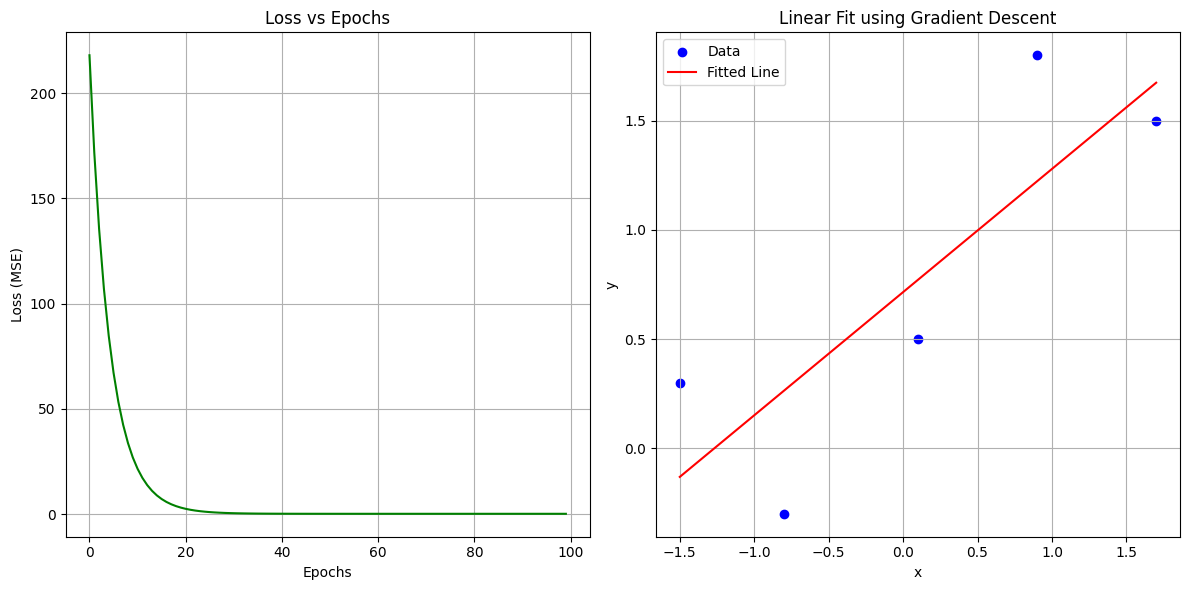

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data ---
x_input = np.array([-1.5, -0.8, 0.1, 0.9, 1.7])
y_target = np.array([0.3, -0.3, 0.5, 1.8, 1.5])

# --- Initialization ---
a = -10.0  # Initial slope
b = 10.0   # Initial intercept

learning_rate = 0.1
num_epochs = 100

# --- Store Loss for Plotting ---
losses = []

# --- Gradient Descent Loop ---
for epoch in range(num_epochs):

    y_pred = a * x_input + b
    error = y_pred - y_target

    # Calculate and store the loss (Mean Squared Error)
    loss = np.mean(error ** 2)
    losses.append(loss)

    # Compute gradients
    da = np.mean(error * x_input)
    db = np.mean(error)

    # Update parameters
    a -= learning_rate * da
    b -= learning_rate * db

    # Optional: print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: a = {a:.4f}, b = {b:.4f}, Loss = {loss:.4f}")

# --- Plot Loss Graph ---
plt.figure(figsize=(12, 6))

# Plot 1: Loss graph over epochs
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), losses, color='green', label='Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid(True)

# --- Plot Line Graph ---
# Plot 2: Data points and fitted line
plt.subplot(1, 2, 2)
plt.scatter(x_input, y_target, color='blue', label='Data')
x_line = np.linspace(min(x_input), max(x_input), 100)
y_line = a * x_line + b
plt.plot(x_line, y_line, color='red', label='Fitted Line')
plt.title("Linear Fit using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


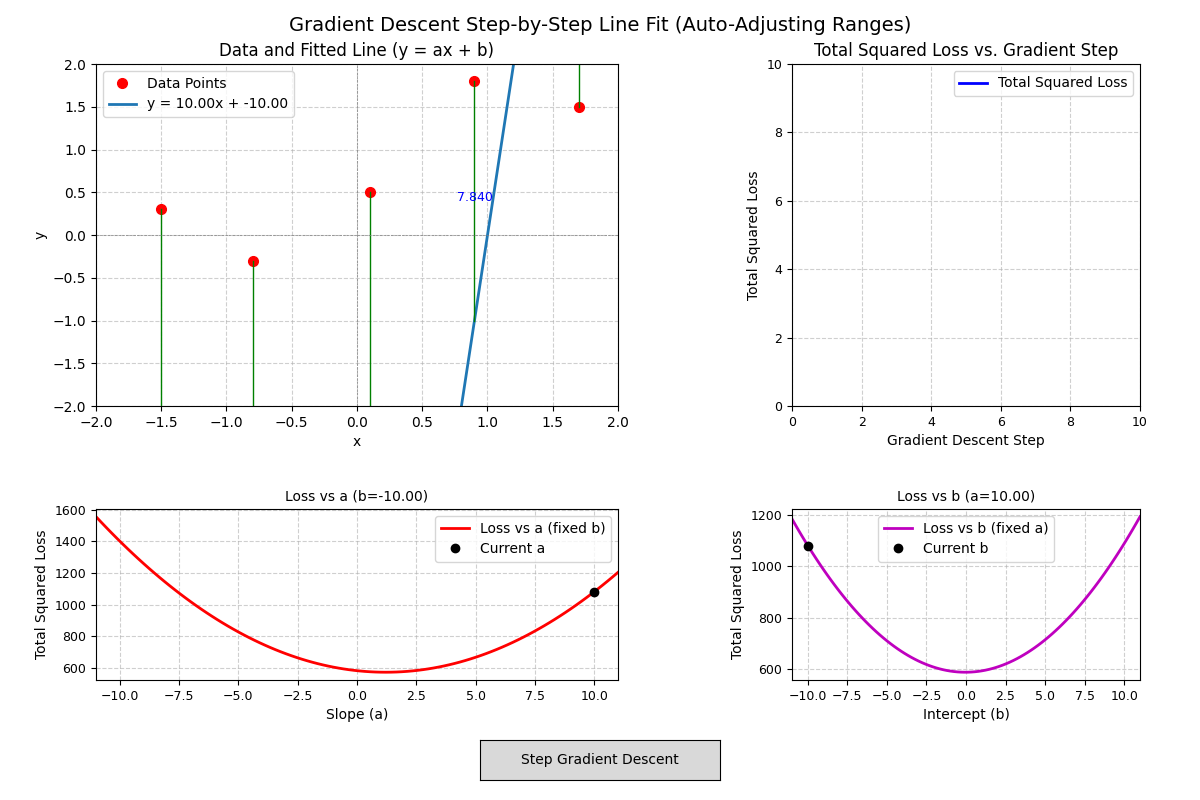

In [2]:
%matplotlib ipympl 

import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.gridspec import GridSpec
import numpy as np

# --- Parameters ---
learning_rate = 0.1 # Learning rate for gradient descent (Note: 1.0 is very high and might diverge quickly)
step_count = 0      # To track gradient descent iterations

# --- Data points ---
points_x = np.array([-1.5, -0.8, 0.1, 0.9, 1.7])
points_y = np.array([0.3, -0.3, 0.5, 1.8, 1.5])

# --- Initial values for a and b ---
a, b = 10, -10
# Keep track of previous values for Loss vs a/b plot updates
initial_a = a
initial_b = b

# --- Define initial ranges for plots ---
a_range_init = np.linspace(-11, 11, 100)  # Initial range for 'a' plot
b_range_init = np.linspace(-11, 11, 100)  # Initial range for 'b' plot

# --- Define GLOBAL variables for the *current* plot ranges ---
# These will be updated dynamically if a or b go out of bounds
current_a_plot_range = a_range_init.copy()
current_b_plot_range = b_range_init.copy()

# X values for plotting the line y=ax+b
x = np.linspace(-2, 2, 100) # This range is for the main plot line, not adjusted automatically

# --- Create the figure ---
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Gradient Descent Step-by-Step Line Fit (Auto-Adjusting Ranges)", fontsize=14)

# --- GridSpec setup ---
gs = GridSpec(2, 2, width_ratios=[3, 2], height_ratios=[2, 1], figure=fig)

# Add subplots
ax_main       = fig.add_subplot(gs[0, 0])
ax_loss       = fig.add_subplot(gs[0, 1])
ax_loss_vs_a = fig.add_subplot(gs[1, 0])
ax_loss_vs_b = fig.add_subplot(gs[1, 1])

# --- Adjust layout spacing ---
fig.subplots_adjust(left=0.08, right=0.95, bottom=0.15, top=0.92, wspace=0.4, hspace=0.4)

# --- Initialize Plot Elements ---

# Main Plot (ax_main) - No changes needed for initialization
ax_main.plot(points_x, points_y, 'ro', markersize=7, label='Data Points')
line, = ax_main.plot(x, a * x + b, lw=2, label=f'y = {a:.2f}x + {b:.2f}')
loss_lines = [ax_main.plot([px, px], [py, a * px + b], 'g-', lw=1)[0] for px, py in zip(points_x, points_y)]
annotations = [ax_main.text(px, (py + (a * px + b)) / 2, f"{(py - (a * px + b))**2:.3f}",
                           fontsize=9, color='blue', ha='center') for px, py in zip(points_x, points_y)]
ax_main.set_title("Data and Fitted Line (y = ax + b)")
ax_main.set_xlabel("x")
ax_main.set_ylabel("y")
ax_main.set_xlim([-2, 2])
ax_main.set_ylim([-2, 2])
ax_main.axhline(0, color='grey', linewidth=0.5, linestyle='--')
ax_main.axvline(0, color='grey', linewidth=0.5, linestyle='--')
ax_main.legend()
ax_main.grid(True, linestyle='--', alpha=0.6)

# Loss Tracking Plot (ax_loss) - No changes needed for initialization
loss_history = []
iteration = []
loss_line_plot, = ax_loss.plot(iteration, loss_history, 'b-', lw=2, label="Total Squared Loss")
ax_loss.set_title("Total Squared Loss vs. Gradient Step")
ax_loss.set_xlabel("Gradient Descent Step")
ax_loss.set_ylabel("Total Squared Loss")
ax_loss.set_xlim([0, 10])
ax_loss.set_ylim([0, 10])
ax_loss.legend()
ax_loss.grid(True, linestyle='--', alpha=0.6)
ax_loss.tick_params(axis='both', which='major', labelsize=9)

# Loss vs a Plot (ax_loss_vs_a) - Initialize using current_a_plot_range
initial_loss_vs_a_values = [sum((points_y - (a_val * points_x + b))**2) for a_val in current_a_plot_range]
loss_vs_a_plot, = ax_loss_vs_a.plot(current_a_plot_range, initial_loss_vs_a_values, 'r-', lw=2, label="Loss vs a (fixed b)")
current_a_marker, = ax_loss_vs_a.plot(a, sum((points_y - (a * points_x + b))**2), 'ko', markersize=6, label='Current a')
ax_loss_vs_a.set_xlabel("Slope (a)")
ax_loss_vs_a.set_ylabel("Total Squared Loss")
ax_loss_vs_a.set_title(f"Loss vs a (b={b:.2f})", fontsize=10)
ax_loss_vs_a.set_xlim(current_a_plot_range[0], current_a_plot_range[-1]) # Set initial xlim
ax_loss_vs_a.grid(True, linestyle='--', alpha=0.6)
ax_loss_vs_a.tick_params(axis='both', which='major', labelsize=9)
ax_loss_vs_a.legend()

# Loss vs b Plot (ax_loss_vs_b) - Initialize using current_b_plot_range
initial_loss_vs_b_values = [sum((points_y - (a * points_x + b_val))**2) for b_val in current_b_plot_range]
loss_vs_b_plot, = ax_loss_vs_b.plot(current_b_plot_range, initial_loss_vs_b_values, 'm-', lw=2, label="Loss vs b (fixed a)")
current_b_marker, = ax_loss_vs_b.plot(b, sum((points_y - (a * points_x + b))**2), 'ko', markersize=6, label='Current b')
ax_loss_vs_b.set_xlabel("Intercept (b)")
ax_loss_vs_b.set_ylabel("Total Squared Loss")
ax_loss_vs_b.set_title(f"Loss vs b (a={a:.2f})", fontsize=10)
ax_loss_vs_b.set_xlim(current_b_plot_range[0], current_b_plot_range[-1]) # Set initial xlim
ax_loss_vs_b.grid(True, linestyle='--', alpha=0.6)
ax_loss_vs_b.tick_params(axis='both', which='major', labelsize=9)
ax_loss_vs_b.legend()


# --- Update Function ---
def update_plots(current_step):
    # Declare globals we might modify
    global initial_a, initial_b, current_a_plot_range, current_b_plot_range

    # Use current global a and b
    current_a = a
    current_b = b

    # --- Check and Adjust Plot Ranges ---
    a_range_updated = False
    b_range_updated = False

    # Check and update a_range
    min_a_plot, max_a_plot = current_a_plot_range[0], current_a_plot_range[-1]
    if current_a < min_a_plot or current_a > max_a_plot:
        width_a = max_a_plot - min_a_plot
        width_a = max(width_a, 1.0) # Ensure minimum width
        padding_a = width_a * 0.2 # Add 20% padding relative to current width
        new_min_a = min(min_a_plot, current_a) - padding_a
        new_max_a = max(max_a_plot, current_a) + padding_a
        current_a_plot_range = np.linspace(new_min_a, new_max_a, 100) # Recalculate range points
        ax_loss_vs_a.set_xlim(new_min_a, new_max_a) # Update plot x-limits
        a_range_updated = True # Flag that range changed

    # Check and update b_range
    min_b_plot, max_b_plot = current_b_plot_range[0], current_b_plot_range[-1]
    if current_b < min_b_plot or current_b > max_b_plot:
        width_b = max_b_plot - min_b_plot
        width_b = max(width_b, 1.0) # Ensure minimum width
        padding_b = width_b * 0.2 # Add 20% padding relative to current width
        new_min_b = min(min_b_plot, current_b) - padding_b
        new_max_b = max(max_b_plot, current_b) + padding_b
        current_b_plot_range = np.linspace(new_min_b, new_max_b, 100) # Recalculate range points
        ax_loss_vs_b.set_xlim(new_min_b, new_max_b) # Update plot x-limits
        b_range_updated = True # Flag that range changed
    # --- End Range Adjustment ---


    # Update Main Plot elements
    line.set_ydata(current_a * x + current_b)
    line.set_label(f'y = {current_a:.2f}x + {current_b:.2f}')

    total_loss = 0
    for loss_line, annotation, px, py in zip(loss_lines, annotations, points_x, points_y):
        line_y_at_px = current_a * px + current_b
        loss_line.set_ydata([py, line_y_at_px])
        squared_error = (py - line_y_at_px)**2
        annotation.set_position((px, (py + line_y_at_px) / 2))
        annotation.set_text(f"{squared_error:.3f}")
        total_loss += squared_error

    # Update Loss History Plot
    if current_step is not None:
        if not loss_history or not np.isclose(total_loss, loss_history[-1]):
             iteration.append(current_step)
             loss_history.append(total_loss)

    if iteration:
        loss_line_plot.set_xdata(iteration)
        loss_line_plot.set_ydata(loss_history)
        ax_loss.set_xlim([0, max(10, iteration[-1] + 5)])
        max_loss_so_far = max(loss_history) if loss_history else 10
        ax_loss.set_ylim([0, max(10, max_loss_so_far * 1.1)])


    # Update Loss vs a Plot (if b changed significantly OR a_range was updated)
    # Use the *potentially updated* current_a_plot_range for calculation
    if not np.isclose(current_b, initial_b) or a_range_updated:
        # Recalculate loss values over the potentially new range
        new_loss_vs_a = [sum((points_y - (a_val * points_x + current_b))**2) for a_val in current_a_plot_range]
        loss_vs_a_plot.set_xdata(current_a_plot_range) # Update x-data for the plot line
        loss_vs_a_plot.set_ydata(new_loss_vs_a)       # Update y-data for the plot line
        ax_loss_vs_a.set_title(f"Loss vs a (b={current_b:.2f})", fontsize=10)
        initial_b = current_b # Update the 'fixed' b for the next check

        # Auto-adjust y-limits based on the new curve
        yrange_a = np.ptp(new_loss_vs_a)
        min_loss_a = np.min(new_loss_vs_a)
        if np.isclose(yrange_a, 0): ax_loss_vs_a.set_ylim([min_loss_a - 1, min_loss_a + 1])
        else: ax_loss_vs_a.set_ylim([min_loss_a - 0.1*yrange_a, min_loss_a + 1.1*yrange_a])


    # Update Loss vs b Plot (if a changed significantly OR b_range was updated)
    # Use the *potentially updated* current_b_plot_range for calculation
    if not np.isclose(current_a, initial_a) or b_range_updated:
         # Recalculate loss values over the potentially new range
        new_loss_vs_b = [sum((points_y - (current_a * points_x + b_val))**2) for b_val in current_b_plot_range]
        loss_vs_b_plot.set_xdata(current_b_plot_range) # Update x-data for the plot line
        loss_vs_b_plot.set_ydata(new_loss_vs_b)       # Update y-data for the plot line
        ax_loss_vs_b.set_title(f"Loss vs b (a={current_a:.2f})", fontsize=10)
        initial_a = current_a # Update the 'fixed' a for the next check

        # Auto-adjust y-limits based on the new curve
        yrange_b = np.ptp(new_loss_vs_b)
        min_loss_b = np.min(new_loss_vs_b)
        if np.isclose(yrange_b, 0): ax_loss_vs_b.set_ylim([min_loss_b - 1, min_loss_b + 1])
        else: ax_loss_vs_b.set_ylim([min_loss_b - 0.1*yrange_b, min_loss_b + 1.1*yrange_b])


    # Update markers on Loss vs a/b plots (always update position)
    current_loss_at_point = total_loss # Use already calculated total_loss
    current_a_marker.set_data([current_a], [current_loss_at_point])
    current_b_marker.set_data([current_b], [current_loss_at_point])

    # Redraw legends
    ax_main.legend()
    ax_loss.legend()
    ax_loss_vs_a.legend()
    ax_loss_vs_b.legend()

    # Redraw the figure
    fig.canvas.draw_idle()


# --- Gradient Descent Step Function --- (No changes needed here)
def gradient_step(event):
    global a, b, step_count, learning_rate

    y_pred = a * points_x + b
    errors = points_y - y_pred
    grad_a = -2 * np.mean(errors * points_x)
    grad_b = -2 * np.mean(errors)

    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b

    step_count += 1
    update_plots(step_count)


# --- Create Button --- (No changes needed here)
button_ax = fig.add_axes([0.4, 0.025, 0.2, 0.05])
step_button = Button(button_ax, 'Step Gradient Descent')
step_button.on_clicked(gradient_step)

# --- Initial Plot Draw ---
update_plots(None) # Pass None for step count on initial draw

# --- Display the plot ---
plt.show()